<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


 ## Exploring and Preparing Data


In this notebook, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage. 

In this notebook, we will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans. 


  ## Objectives
Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

- Exploratory Data Analysis
- Preparing Data  Feature Engineering 


----


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab 



In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis 


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [2]:
df=pd.read_csv("../data/dataset_part_2.csv")

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


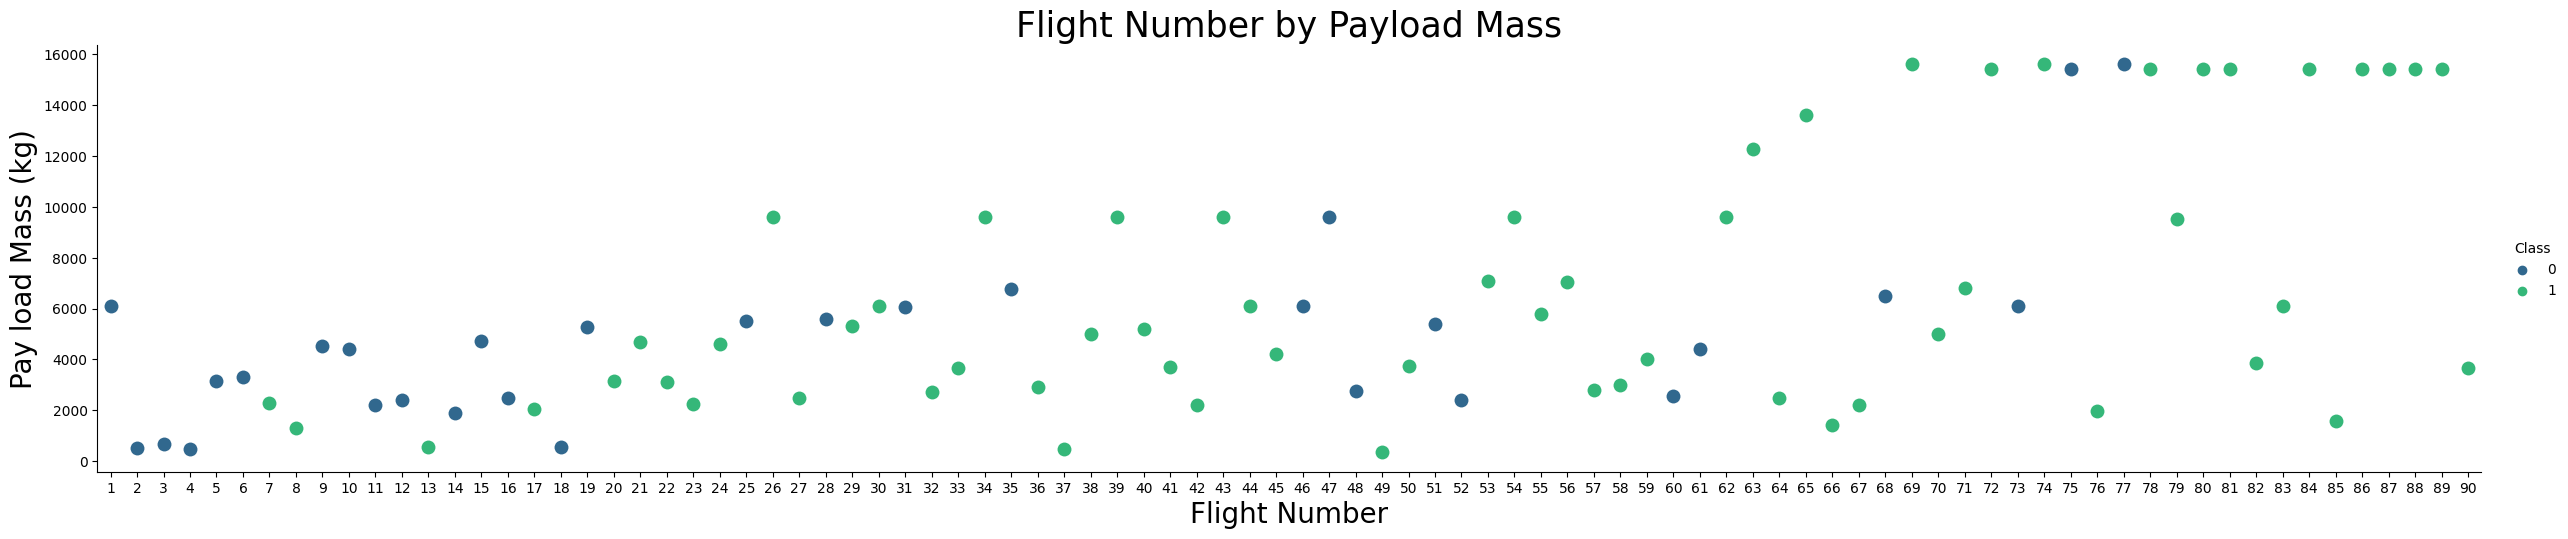

In [42]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5, palette='viridis', s=100)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.title('Flight Number by Payload Mass', fontsize=25)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


### 1. Relationship between Flight Number and Launch Site


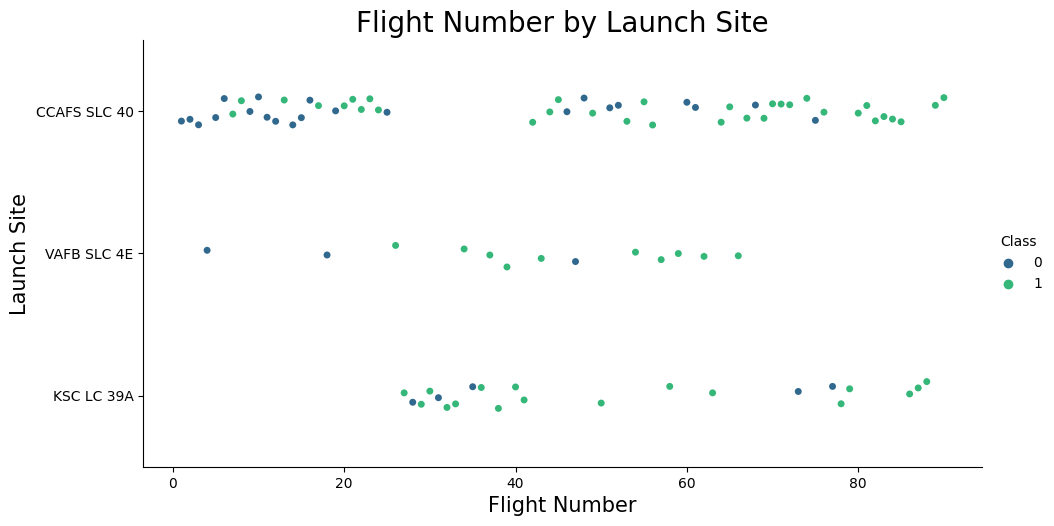

In [45]:
sns.catplot(data=df, x='FlightNumber', y='LaunchSite', hue='Class', palette='viridis', aspect=2)
plt.xlabel("Flight Number",fontsize=15)
plt.ylabel("Launch Site",fontsize=15)
plt.title('Flight Number by Launch Site', fontsize=20)
plt.show()

Over time, success rates have been improving in general. However, compared to Cape Canaveral Air Force Station (CCAFS), the launch sites Kennedy Space Center (KSC) and Vandenberg Air Force Base (VAFB) have a higher number of successful flights.

### 2. Relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


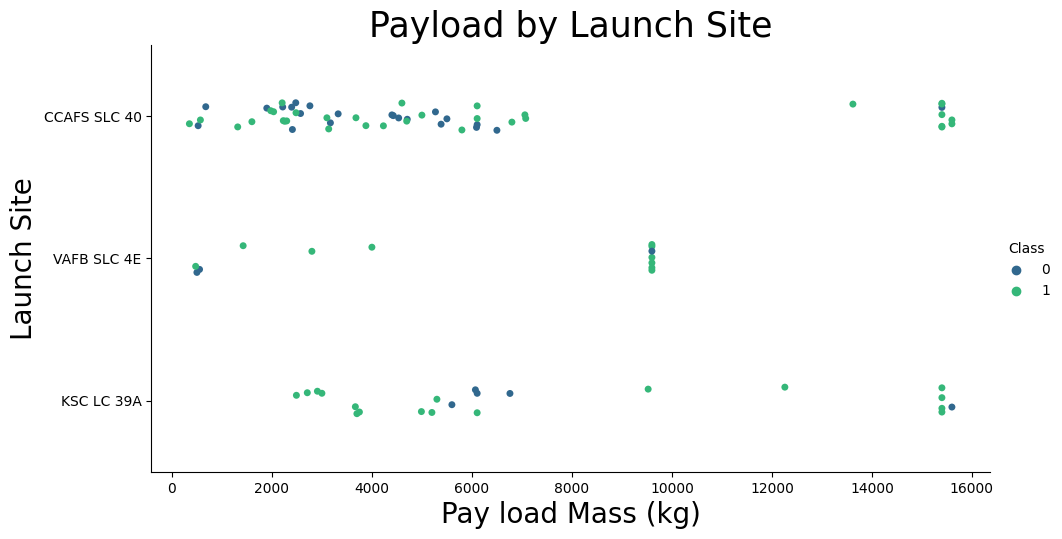

In [47]:
sns.catplot(data=df, x='PayloadMass', y='LaunchSite', hue='Class', palette='viridis', aspect=2)
plt.xlabel("Pay load Mass (kg)", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.title('Payload by Launch Site', fontsize=25)
plt.show()

When observing the Payload Vs. Launch Site scatter point chart, we find that above for heavy payloads (above 8000 kg), there are more successfull landings. However, for the VAFB-SLC  launchsite there are no  rockets  launched for  hpayload mass greater than 10000.

### 3. Relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


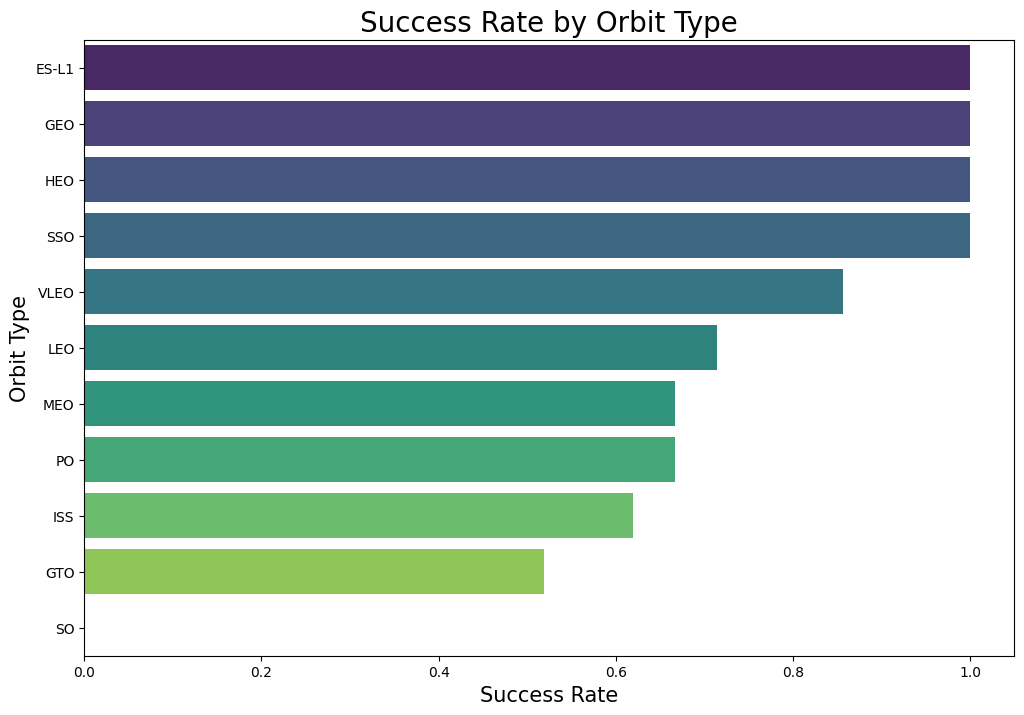

In [31]:
# Group the data by 'Orbit' and calculate the success rate for each orbit type
orbit_bar = df.groupby('Orbit')['Class'].mean().reset_index()

# Sort the data for better visualisation
orbit_bar = orbit_bar.sort_values(by='Class', ascending=False)

# Create a bar plot to visualize the success rates for each 'Orbit'
plt.figure(figsize=(12, 8))
sns.barplot(data=orbit_bar, x='Class', y='Orbit', palette='viridis')
plt.xlabel('Success Rate', fontsize=15)
plt.ylabel('Orbit Type', fontsize=15)
plt.title('Success Rate by Orbit Type', fontsize=20)
plt.show()

The orbits with the highest success rate are : `ES-L1`, `GEO`, `HEO` and `SSO`


### 4. Relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


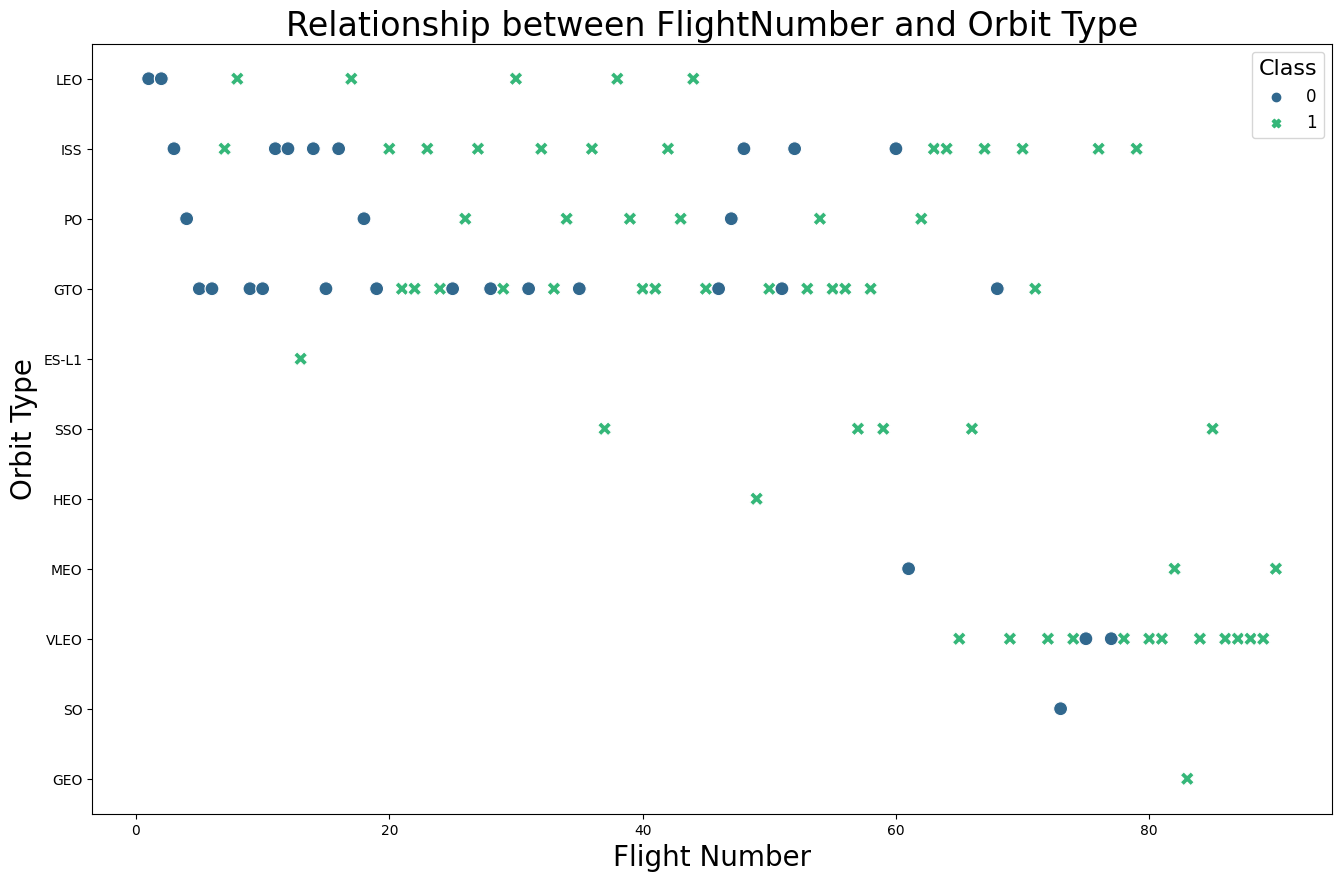

In [40]:
# Create scatter plots to investigate the relationship between FlightNumber and Orbit type
plt.figure(figsize=(16, 10))
sns.scatterplot(data=df, x='FlightNumber', y='Orbit', hue='Class', style='Class', palette='viridis', s=100)
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Orbit Type', fontsize=20)
plt.title('Relationship between FlightNumber and Orbit Type', fontsize=24)
plt.legend(title='Class', title_fontsize='16', fontsize='12')
plt.show()

Things to note:
- in the LEO orbit the Success appears related to the number of flights; 
- on the other hand, there seems to be no relationship between flight number when in GTO orbit.

### 5. Relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


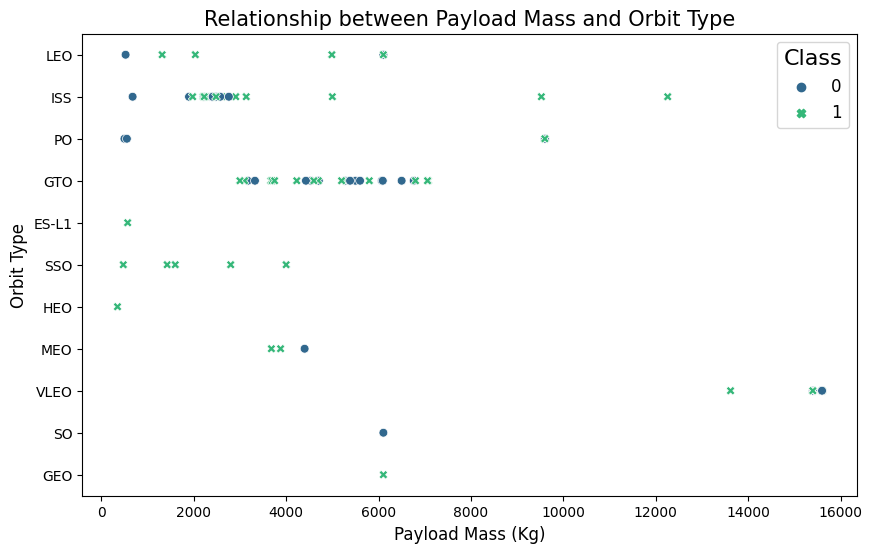

In [56]:
## Create scatter plots to investigate the relationship between FlightNumber and Orbit type
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PayloadMass', y='Orbit', hue='Class', style='Class', palette='viridis', s=40)
plt.xlabel('Payload Mass (Kg)', fontsize=12)
plt.ylabel('Orbit Type', fontsize=12)
plt.title('Relationship between Payload Mass and Orbit Type', fontsize=15)
plt.legend(title='Class', title_fontsize='16', fontsize='12')
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.   

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.




### 6. Yearly trend of the launch success 


In [59]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

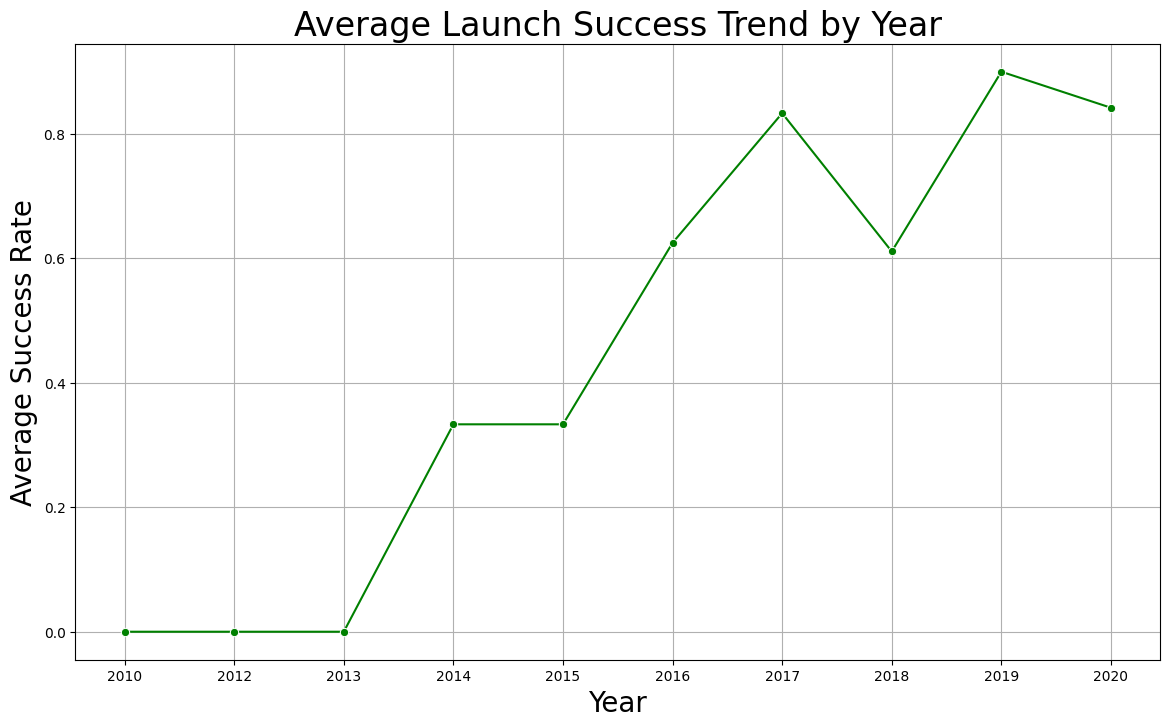

In [67]:
# Convert the 'Date' column to string format and then extract years using the Extract_year function
year=[]
df['Year'] = Extract_year(df['Date'].astype(str))

# Group by 'Year' and calculate the average success rate
avg_success_by_year = df.groupby('Year')['Class'].mean().reset_index()

# Plotting the line chart for average launch success trend
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='Class', data=avg_success_by_year, marker='o', color='green')
plt.xlabel('Year', fontsize=20)
plt.ylabel('Average Success Rate', fontsize=20)
plt.title('Average Launch Success Trend by Year', fontsize=24)
# Add grid lines
plt.grid(True)
plt.show()


The line chart displays the average launch success trend by year, revealing an upward trend from 2013 to 2017 (being stable in 2014). This indicates improvements in launch success rates over the years. 

## Features Engineering 


We've obtained some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future.


In [68]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [69]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FlightNumber  90 non-null     int64  
 1   PayloadMass   90 non-null     float64
 2   Orbit         90 non-null     object 
 3   LaunchSite    90 non-null     object 
 4   Flights       90 non-null     int64  
 5   GridFins      90 non-null     bool   
 6   Reused        90 non-null     bool   
 7   Legs          90 non-null     bool   
 8   LandingPad    64 non-null     object 
 9   Block         90 non-null     float64
 10  ReusedCount   90 non-null     int64  
 11  Serial        90 non-null     object 
dtypes: bool(3), float64(2), int64(3), object(4)
memory usage: 6.7+ KB


 We will use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Then, we will assign the value to the variable <code>features_one_hot</code>. Finally, we will display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [71]:
# Use get_dummies to apply OneHotEncoding to the specified columns
one_hot_columns = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']
features_one_hot = pd.get_dummies(features, columns=one_hot_columns)
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [72]:
# Cast the entire features_one_hot DataFrame to variable type float64
features_one_hot = features_one_hot.astype('float64')

features_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 80 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FlightNumber                         90 non-null     float64
 1   PayloadMass                          90 non-null     float64
 2   Flights                              90 non-null     float64
 3   GridFins                             90 non-null     float64
 4   Reused                               90 non-null     float64
 5   Legs                                 90 non-null     float64
 6   Block                                90 non-null     float64
 7   ReusedCount                          90 non-null     float64
 8   Orbit_ES-L1                          90 non-null     float64
 9   Orbit_GEO                            90 non-null     float64
 10  Orbit_GTO                            90 non-null     float64
 11  Orbit_HEO                         

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range. 


In [73]:
features_one_hot.to_csv('../data/dataset_part_3.csv', index=False)